In [1]:
from rdkit import rdBase, Chem, DataStructs
from rdkit.Chem import AllChem, Draw, Descriptors, PandasTools
import pandas as pd
from IPython.display import HTML
from IPython import display
 
print('rdkit version: ',rdBase.rdkitVersion)
print('pandas version: ', pd.__version__)

rdkit version:  2020.09.1
pandas version:  1.2.0


In [27]:
# FingerPrint
# FP対象の分子作成
mol = Chem.MolFromSmiles('c1ccccc1CC1CC1')
# FPのビット列記録用dict
bit_info={}
# MorganFingerprint - radius=2(半径2まで)
fp = AllChem.GetMorganFingerprintAsBitVect(mol=mol, radius=2, nBits=1024, bitInfo=bit_info)

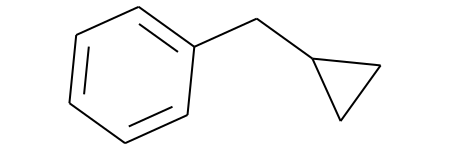

In [28]:
# 対象分子の描画
mol

In [46]:
# FPのビット番号表示
bit_info.keys()

dict_keys([29, 42, 64, 80, 175, 301, 356, 389, 432, 458, 573, 647, 726, 730, 849, 872, 926, 1019])

In [47]:
# 872の構造がどこの部分か確認
bit_info[872] # Return:(AtomInd, radius)

((6, 2),)

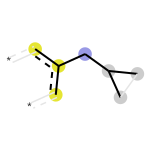

In [48]:
# 872の構造を描画
mfp2_svg = Draw.DrawMorganBit(mol, 872, bit_info, useSVG=True)
mfp2_svg

In [49]:
# 872の構造をsmilesで抽出してみる
# AtomInd=5のradius=2を取得
env = Chem.FindAtomEnvironmentOfRadiusN(mol,2,6)
# AtomMap記録用
amap = {}
# 部分構造取得
submol = Chem.PathToSubmol(mol,env,atomMap=amap)
print('原子数:{}'.format(submol.GetNumAtoms()))
# smilesで取得
print(Chem.MolToSmiles(submol))

原子数:7
cc(c)CC(C)C


In [52]:
# Atom and AtomIndex
def draw_mol_with_atom_index(mol):
    for atom in mol.GetAtoms(): # 原子数分
        atom.SetAtomMapNum(atom.GetIdx())
    return mol

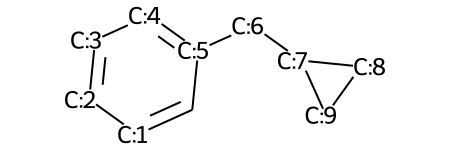

In [53]:
# 原子とインデックス表示
draw_mol_with_atom_index(mol)